## **1. 기본 정보**

- 기준년월
- ID
- 남녀구분코드
- 연령

---

## **2. 회원 상태 관련 변수**

- 회원여부_이용가능
- 회원여부_이용가능_CA
- 회원여부_이용가능_카드론
- 회원여부_연체

---

## **3. 카드 소지 및 이용 상태**

### **(1) 카드 소지 여부 및 수량**

- 소지여부_신용
- 소지카드수_유효_신용
- 소지카드수_이용가능_신용


### **(2) 유효 카드 수량**

- 유효카드수_신용체크
- 유효카드수_신용
- 유효카드수_체크


### **(3) 이용 가능 카드 수량**

- 이용가능카드수_신용체크
- 이용가능카드수_신용
- 이용가능카드수_체크


### **(4) 실제 이용 카드 수량**

- 이용카드수_신용체크
- 이용카드수_신용
- 이용카드수_체크

---

## **4. 탈회 관련 변수**

- 탈회횟수_누적
- 최종탈회후경과월

---

## **5. 이용 금액 관련 변수**

### **(1) 최근 3개월(R3M) 이용 금액**

- 이용금액_R3M_신용체크
- 이용금액_R3M_신용
- 이용금액_R3M_체크


### **(2) 1순위 카드 관련 정보**

- _1순위카드이용금액
- _1순위카드이용건수
- _1순위신용체크구분

---

### **요약**

1. 기본 정보: 4개
2. 회원 상태 관련 변수: 4개
3. 카드 소지 및 이용 상태: 12개
4. 탈회 관련 변수: 2개
5. 이용 금액 관련 변수: 6개

**총합: 28개**

<br>

### 회원 상태 관련:

회원여부_이용가능

회원여부_이용가능_CA

회원여부_이용가능_카드론

회원여부_연체

이용거절여부_카드론

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

df = pd.read_csv('회원정보_merged.csv')

select_columns = [
    '회원여부_이용가능',
    '회원여부_이용가능_CA',
    '회원여부_이용가능_카드론',
    '회원여부_연체',
    '이용거절여부_카드론'
]

In [17]:
# 각 컬럼의 고유값 여부 확인
unique_values_check = {column: df[column].is_unique for column in select_columns}
print(unique_values_check)

{'회원여부_이용가능': False, '회원여부_이용가능_CA': False, '회원여부_이용가능_카드론': False, '회원여부_연체': False, '이용거절여부_카드론': False}


In [12]:
for column in select_columns:
    print(f"컬럼: {column}")
    print(df[column].value_counts())
    print()

컬럼: 회원여부_이용가능
회원여부_이용가능
1    2286180
0     113820
Name: count, dtype: int64

컬럼: 회원여부_이용가능_CA
회원여부_이용가능_CA
1    2112243
0     287757
Name: count, dtype: int64

컬럼: 회원여부_이용가능_카드론
회원여부_이용가능_카드론
1    1491148
0     908852
Name: count, dtype: int64

컬럼: 회원여부_연체
회원여부_연체
0    2359008
1      40992
Name: count, dtype: int64

컬럼: 이용거절여부_카드론
이용거절여부_카드론
0    1925770
1     474230
Name: count, dtype: int64



각 컬림이 0과 1만 포함하는지 확인

In [2]:
for column in ['회원여부_이용가능', '회원여부_이용가능_CA', '회원여부_이용가능_카드론', '회원여부_연체', '이용거절여부_카드론']:
    unique_values = df[column].unique()
    print(f"{column}의 고유값: {unique_values}")

회원여부_이용가능의 고유값: [1 0]
회원여부_이용가능_CA의 고유값: [1 0]
회원여부_이용가능_카드론의 고유값: [0 1]
회원여부_연체의 고유값: [0 1]
이용거절여부_카드론의 고유값: [0 1]


비율 확인
- 각 컬럼에서 0과 1의 비율을 계산하여 데이터가 비정상적으로 치우친 경우를 확인

In [3]:
for column in ['회원여부_이용가능', '회원여부_이용가능_CA', '회원여부_이용가능_카드론', '회원여부_연체', '이용거절여부_카드론']:
    value_counts = df[column].value_counts(normalize=True)  # 비율 계산
    print(f"{column}의 값 비율:\n{value_counts}\n")

회원여부_이용가능의 값 비율:
회원여부_이용가능
1    0.952575
0    0.047425
Name: proportion, dtype: float64

회원여부_이용가능_CA의 값 비율:
회원여부_이용가능_CA
1    0.880101
0    0.119899
Name: proportion, dtype: float64

회원여부_이용가능_카드론의 값 비율:
회원여부_이용가능_카드론
1    0.621312
0    0.378688
Name: proportion, dtype: float64

회원여부_연체의 값 비율:
회원여부_연체
0    0.98292
1    0.01708
Name: proportion, dtype: float64

이용거절여부_카드론의 값 비율:
이용거절여부_카드론
0    0.802404
1    0.197596
Name: proportion, dtype: float64



회원여부_이용가능: 0의 비율이 매우 낮음.

회원여부_연체: 1의 비율이 매우 낮음.

회원가능 분포 확인

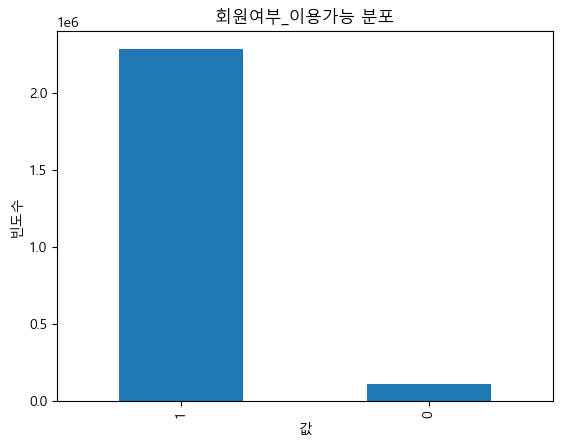

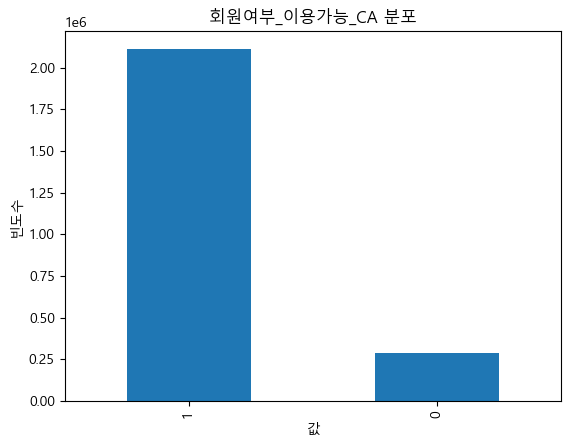

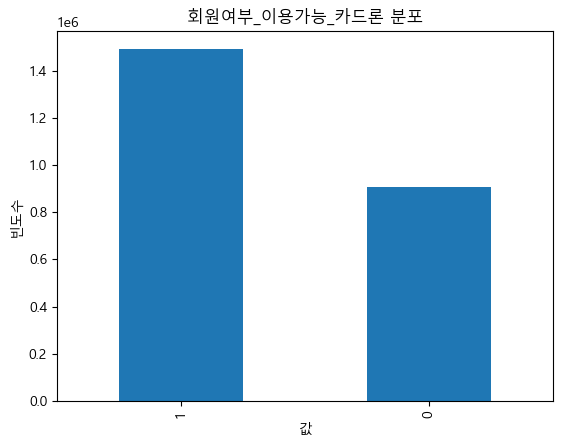

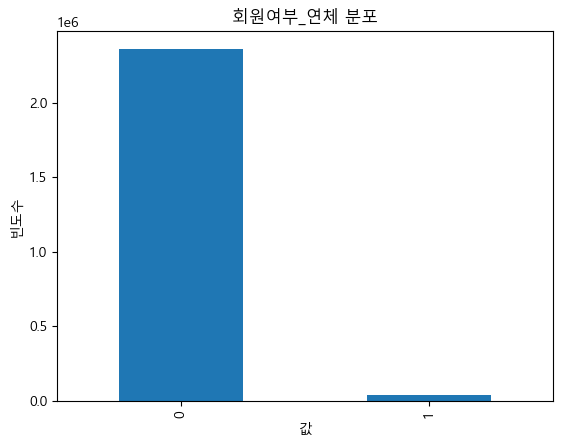

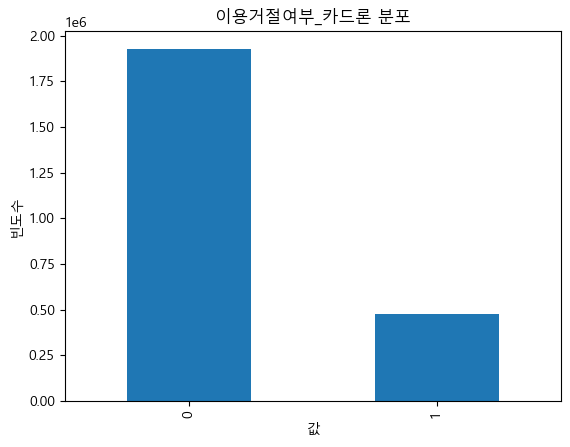

In [4]:
import matplotlib.pyplot as plt

for column in ['회원여부_이용가능', '회원여부_이용가능_CA', '회원여부_이용가능_카드론', '회원여부_연체', '이용거절여부_카드론']:
    df[column].value_counts().plot(kind='bar')
    plt.title(f"{column} 분포")
    plt.xlabel("값")
    plt.ylabel("빈도수")
    plt.show()

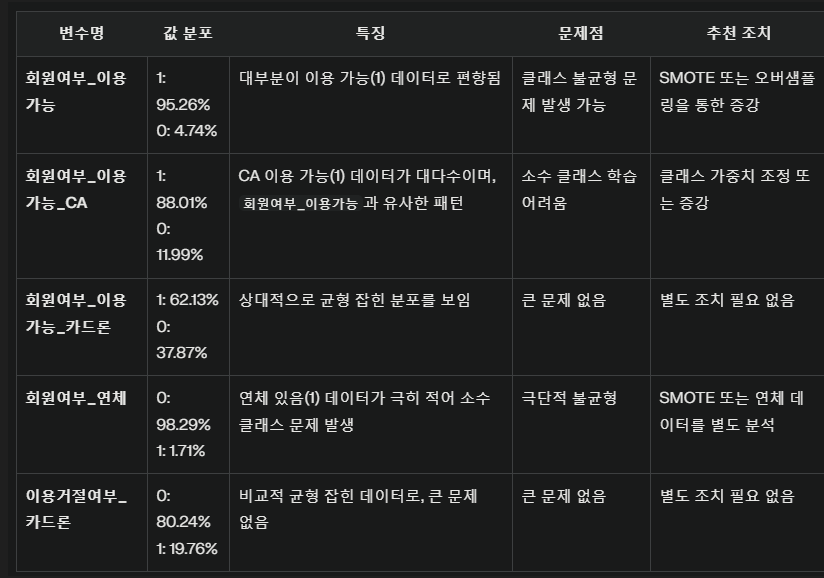

- 한번 물어보기(회원여부 가능, 회원여부_이용가능_CA, 회원여부_연체)

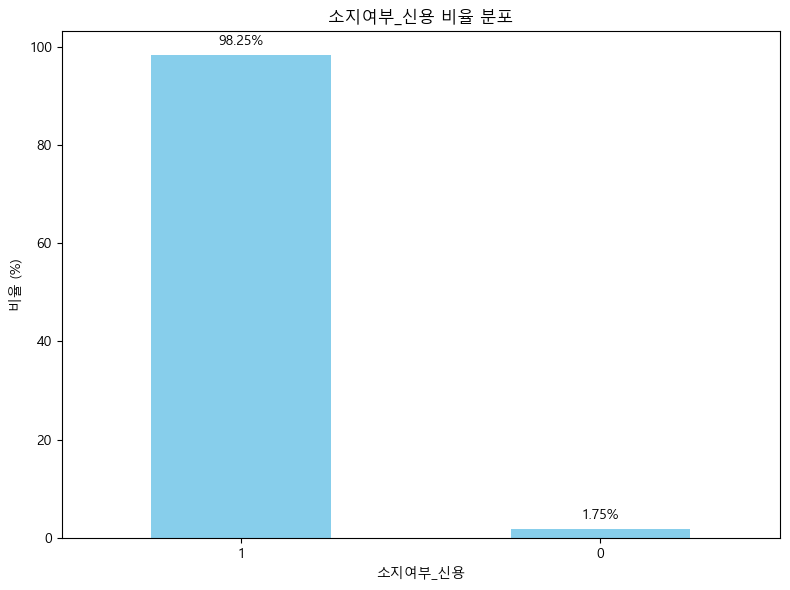

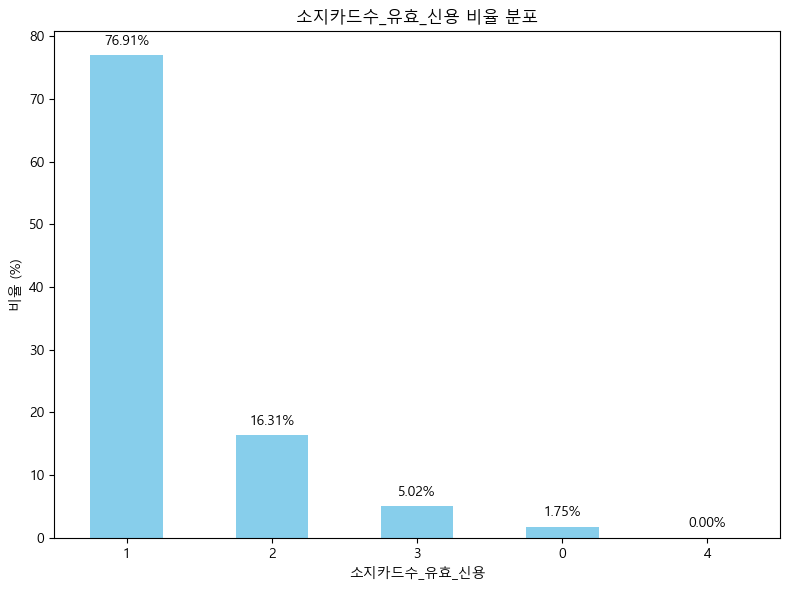

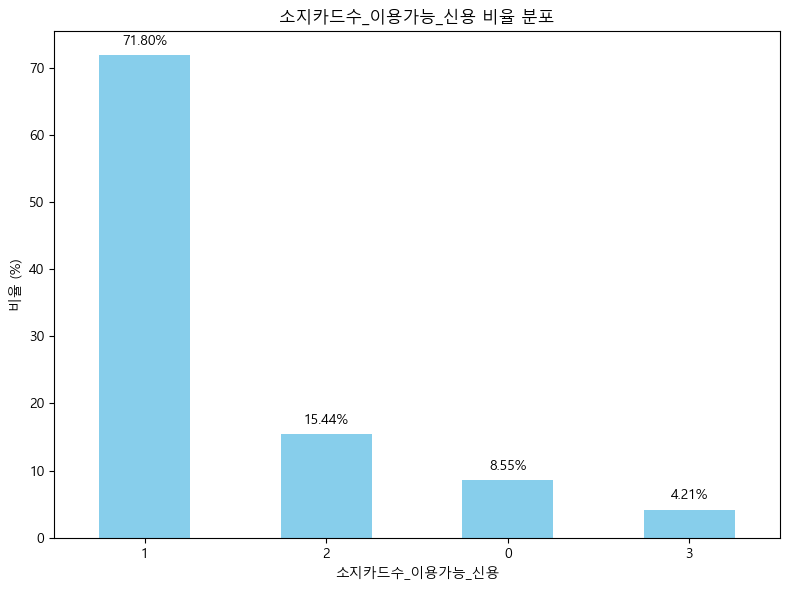

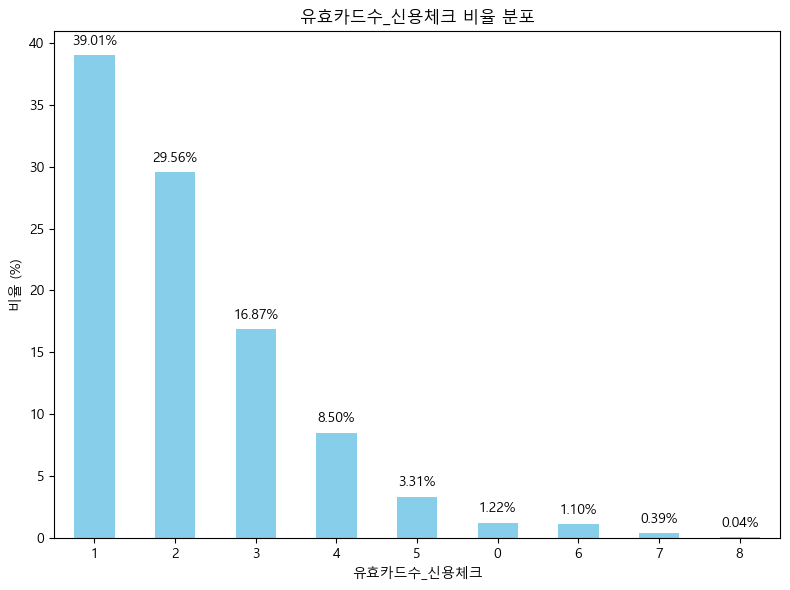

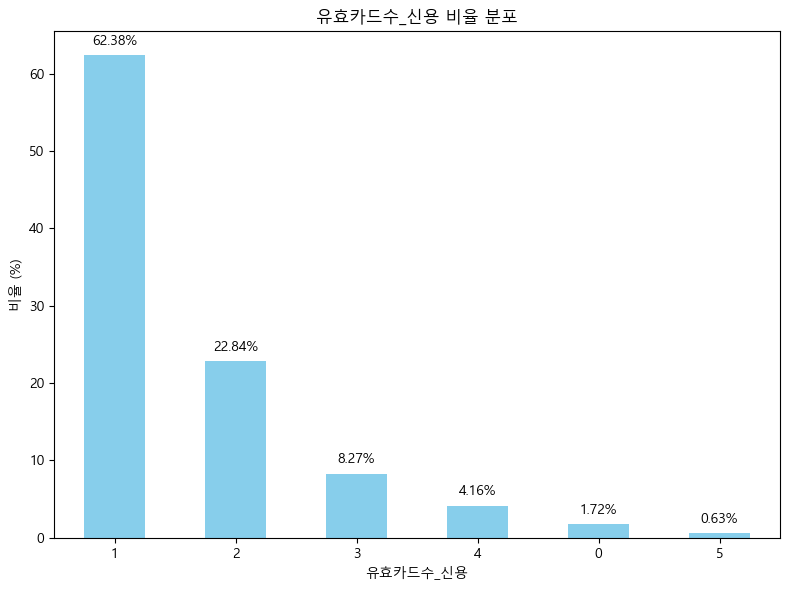

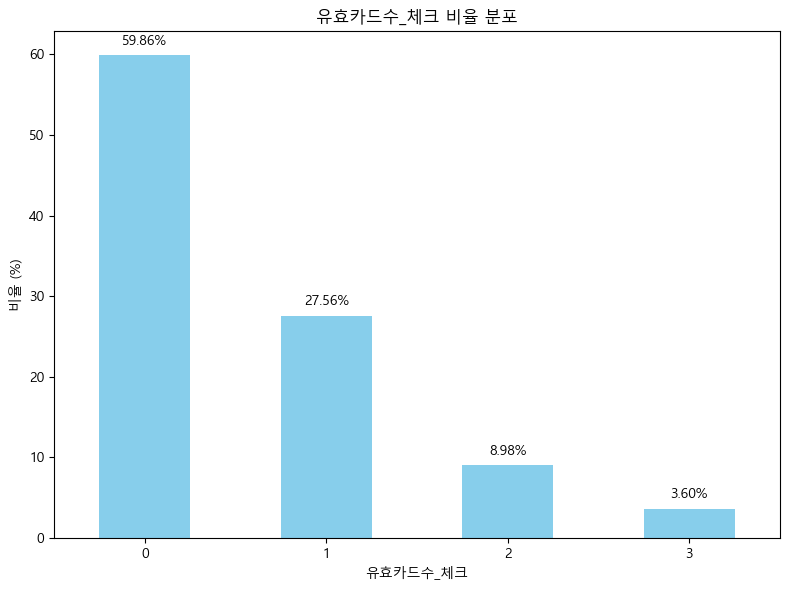

In [16]:
for column in select_columns:
    # 데이터 분포 계산
    value_counts = df[column].value_counts()

    total = len(df[column])
    percentages = value_counts / total * 100

    plt.figure(figsize=(8, 6))
    ax = percentages.plot(kind='bar', color='skyblue')
    plt.title(f'{column} 비율 분포')
    plt.xlabel(column)
    plt.ylabel('비율 (%)')
    plt.xticks(rotation=0)

    # 막대 위에 값 표시
    for i, p in enumerate(ax.patches):
        ax.annotate(f'{percentages.iloc[i]:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()
    plt.show()
    plt.close() 

### 1. 회원여부\_이용가능

- **분포**:
    * 1 (이용 가능): 2,286,180
    * 0 (이용 불가능): 113,820
- **인사이트**:
    * 대부분의 회원이 카드/서비스를 이용 가능한 상태입니다.
    * 이용 불가능한 회원의 비율은 상대적으로 낮지만, 그 이유를 파악하여 개선할 필요가 있습니다 (예: 정지, 탈퇴 등).


### 2. 회원여부\_이용가능\_CA

- **분포**:
    * 1 (이용 가능): 2,112,243
    * 0 (이용 불가능): 287,757
- **인사이트**:
    * 대부분의 회원이 CA (Cash Advance, 현금 서비스)를 이용 가능한 상태입니다.
    * 현금 서비스 이용이 불가능한 회원의 비율은 12.1%로, 이들이 현금 서비스를 이용할 수 없는 이유에 대한 분석이 필요합니다.


### 3. 회원여부\_이용가능\_카드론

- **분포**:
    * 1 (이용 가능): 1,491,148
    * 0 (이용 불가능): 908,852
- **인사이트**:
    * 카드론 이용 가능 회원과 불가능 회원의 비율이 상대적으로 균등합니다.
    * 카드론 이용이 불가능한 회원이 많은 이유를 분석하고, 카드론 이용 기준을 재검토할 필요가 있을 수 있습니다.


### 4. 회원여부\_연체

- **분포**:
    * 0 (연체 없음): 2,359,008
    * 1 (연체): 40,992
- **인사이트**:
    * 대부분의 회원이 연체 없이 정상적으로 이용하고 있습니다.
    * 연체 회원 비율은 매우 낮지만, 연체 관리를 위한 지속적인 노력과 연체 방지 전략이 필요합니다.


### 5. 이용거절여부\_카드론

- **분포**:
    * 0 (이용 거절 없음): 1,925,770
    * 1 (이용 거절): 474,230
- **인사이트**:
    * 상당수의 회원이 카드론 이용을 거절당한 경험이 있습니다.

---

### 카드 소지 및 유효성 관련:

소지여부_신용

소지카드수_유효_신용

소지카드수_이용가능_신용

유효카드수_신용체크

유효카드수_신용

유효카드수_체크



In [17]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

df = pd.read_csv('병합된 데이터\\1_회원정보_merged.csv')

select_columns = [
    '소지여부_신용',
    '소지카드수_유효_신용',
    '소지카드수_이용가능_신용',
    '유효카드수_신용체크',
    '유효카드수_신용',
    '유효카드수_체크'
]

In [18]:
for column in select_columns:
    print(f"컬럼: {column}")
    print(df[column].value_counts())
    print()

컬럼: 소지여부_신용
소지여부_신용
1    2358113
0      41887
Name: count, dtype: int64

컬럼: 소지카드수_유효_신용
소지카드수_유효_신용
1    1845949
2     391523
3     120560
0      41882
4         86
Name: count, dtype: int64

컬럼: 소지카드수_이용가능_신용
소지카드수_이용가능_신용
1    1723263
2     370561
0     205225
3     100951
Name: count, dtype: int64

컬럼: 유효카드수_신용체크
유효카드수_신용체크
1    936149
2    709422
3    404994
4    203891
5     79437
0     29233
6     26423
7      9395
8      1056
Name: count, dtype: int64

컬럼: 유효카드수_신용
유효카드수_신용
1    1497037
2     548265
3     198458
4      99794
0      41303
5      15143
Name: count, dtype: int64

컬럼: 유효카드수_체크
유효카드수_체크
0    1436752
1     661328
2     215445
3      86475
Name: count, dtype: int64



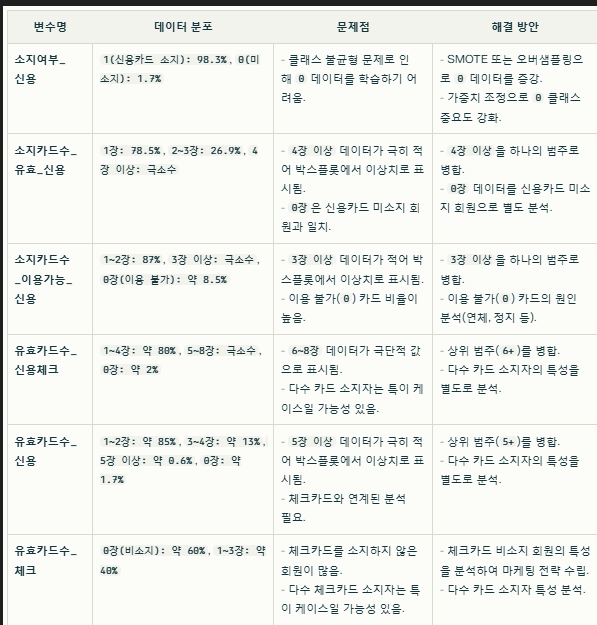

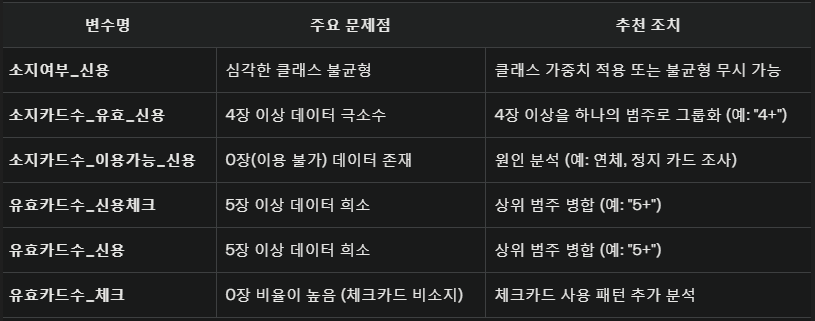

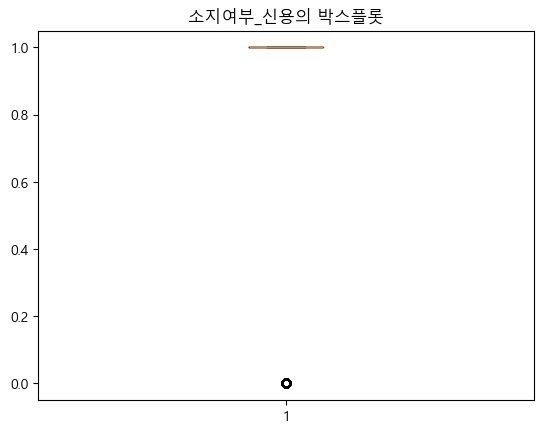

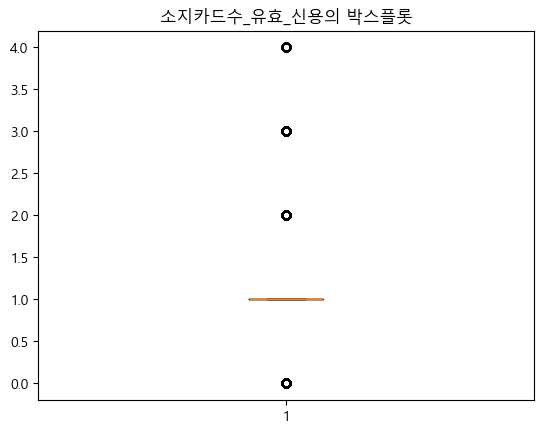

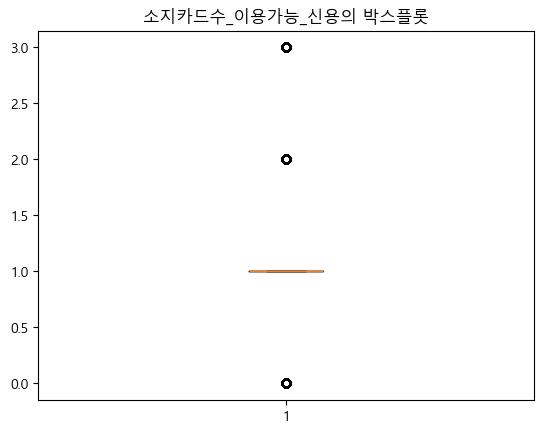

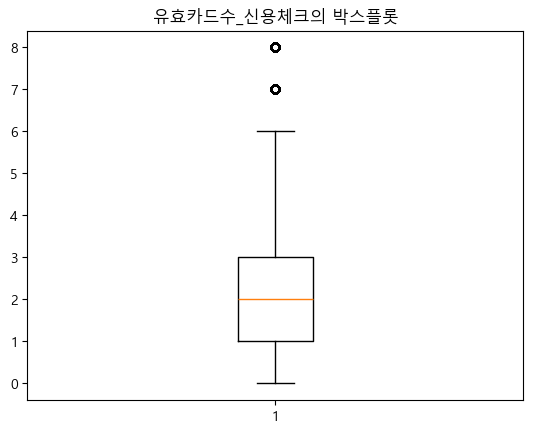

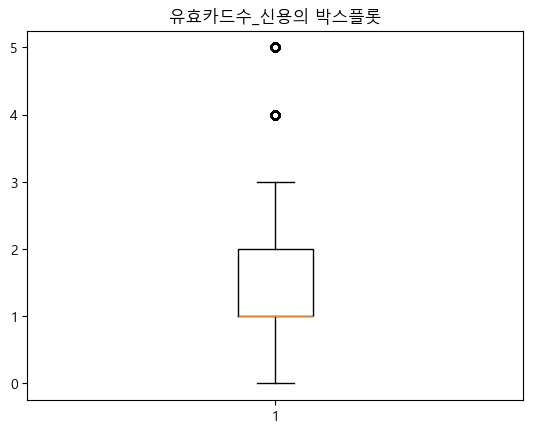

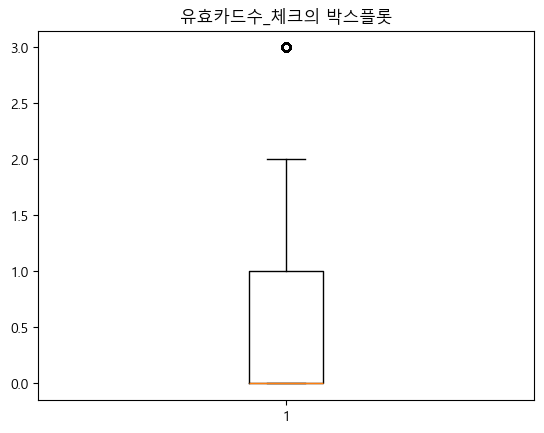

In [5]:
import matplotlib.pyplot as plt

for column in ['소지여부_신용', '소지카드수_유효_신용', '소지카드수_이용가능_신용', '유효카드수_신용체크', '유효카드수_신용', '유효카드수_체크']:
    plt.boxplot(df[column])
    plt.title(f"{column}의 박스플롯")
    plt.show()

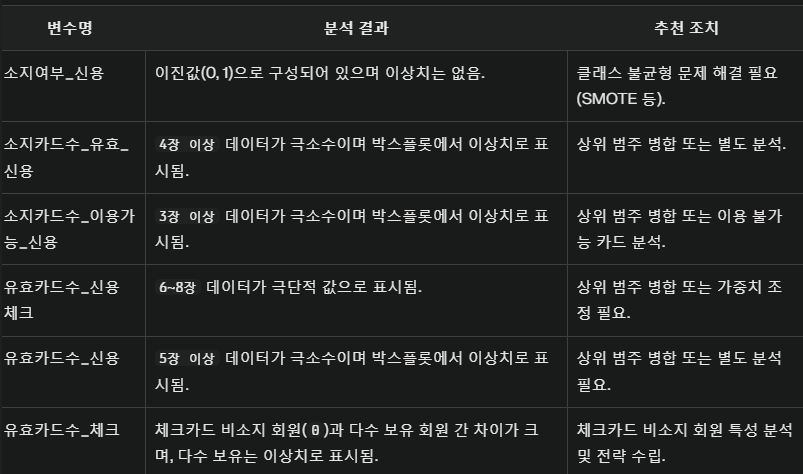

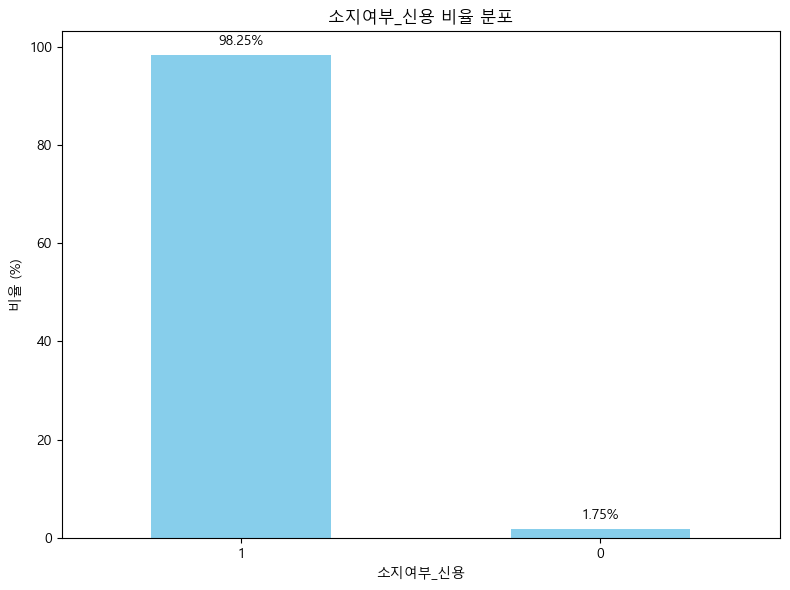

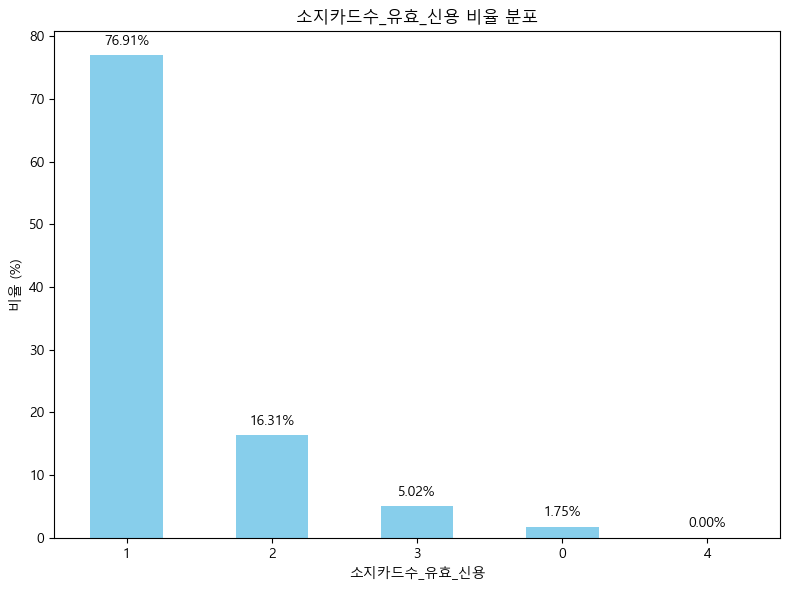

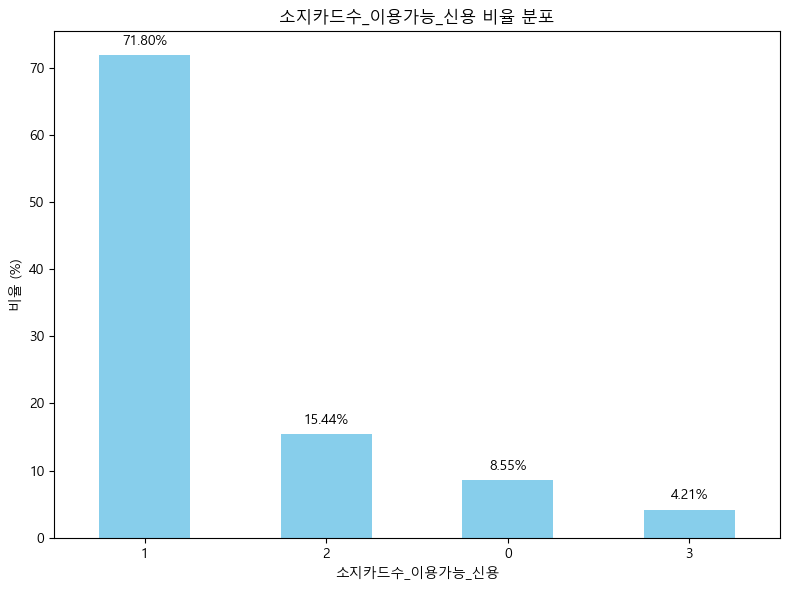

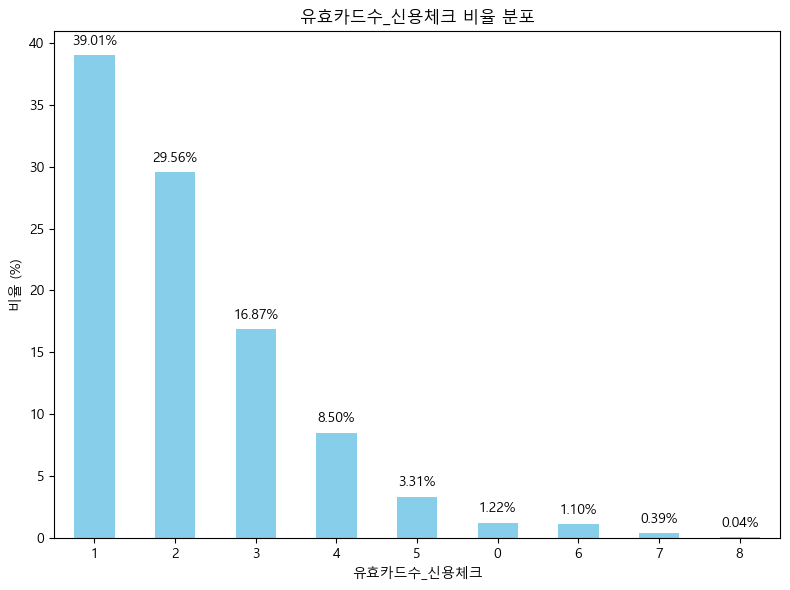

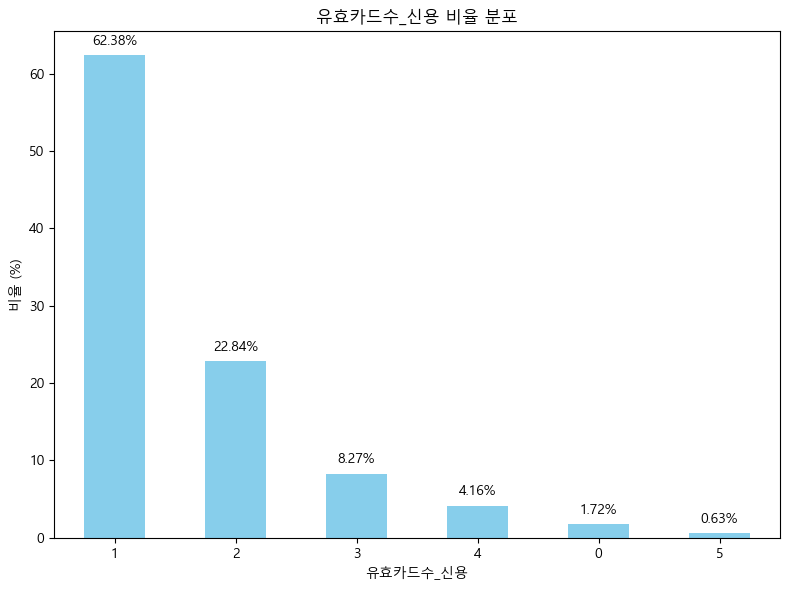

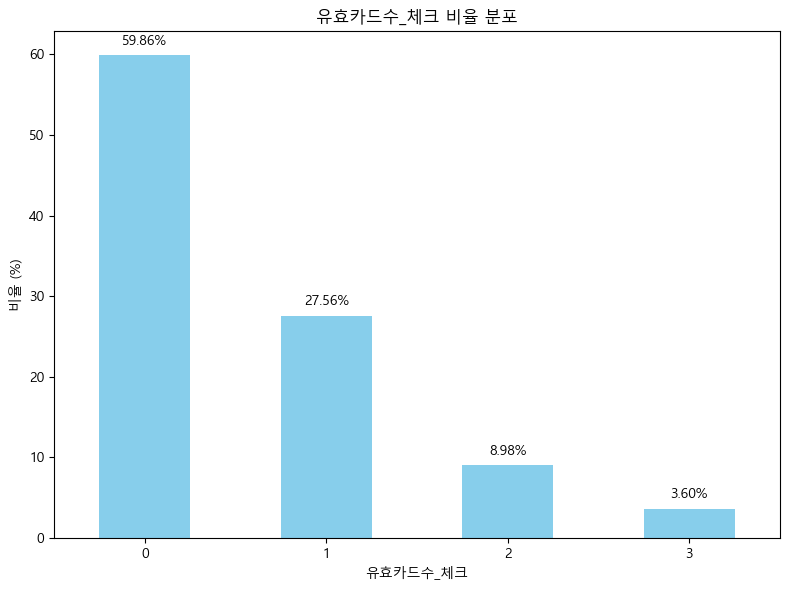

In [19]:
for column in select_columns:
    # 데이터 분포 계산
    value_counts = df[column].value_counts()

    total = len(df[column])
    percentages = value_counts / total * 100

    plt.figure(figsize=(8, 6))
    ax = percentages.plot(kind='bar', color='skyblue')
    plt.title(f'{column} 비율 분포')
    plt.xlabel(column)
    plt.ylabel('비율 (%)')
    plt.xticks(rotation=0)

    # 막대 위에 값 표시
    for i, p in enumerate(ax.patches):
        ax.annotate(f'{percentages.iloc[i]:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()
    plt.show()
    plt.close() 

### 1. 소지여부\_신용

- **분포**:
    - 1 (소지): 2,358,113
    - 0 (미소지): 41,887
- **인사이트**:
    - 대부분의 회원이 신용카드를 소지하고 있습니다. 신용카드를 미소지한 회원은 매우 적습니다.


### 2. 소지카드수\_유효\_신용

- **분포**:
    - 1장: 1,845,949
    - 2장: 391,523
    - 3장: 120,560
    - 0장: 41,882
    - 4장: 86
- **인사이트**:
    - 대부분의 회원이 1장의 유효한 신용카드를 소지하고 있습니다.
    - 2장 이상의 신용카드를 소지한 회원은 상대적으로 적습니다.
    - 0장은 '소지여부_신용'이 0인 경우와 일치할 가능성이 높습니다.


### 3. 소지카드수\_이용가능\_신용

- **분포**:
    - 1장: 1,723,263
    - 2장: 370,561
    - 0장: 205,225
    - 3장: 100,951
- **인사이트**:
    - 대부분의 회원이 1장의 이용 가능한 신용카드를 소지하고 있습니다.
    - 이용 가능한 신용카드가 0장인 회원은 '소지여부_신용'이 0인 경우와 일부 카드 이용 정지된 경우를 포함할 수 있습니다.


### 4. 유효카드수\_신용체크

- **분포**:
    - 1장: 936,149
    - 2장: 709,422
    - 3장: 404,994
    - 4장: 203,891
    - 5장: 79,437
    - 0장: 29,233
    - 6장: 26,423
    - 7장: 9,395
    - 8장: 1,056
- **인사이트**:
    - 대부분의 회원이 1~4장의 신용체크카드를 소지하고 있습니다.
    - 5장 이상의 신용체크카드를 소지한 회원은 매우 적습니다.
    - 유효한 신용체크카드가 0장인 회원은 신용카드나 체크카드를 전혀 사용하지 않거나, 특정 조건에 해당될 수 있습니다.


### 5. 유효카드수\_신용

- **분포**:
    - 1장: 1,497,037
    - 2장: 548,265
    - 3장: 198,458
    - 4장: 99,794
    - 0장: 41,303
    - 5장: 15,143
- **인사이트**:
    - 대부분의 회원이 1~2장의 유효한 신용카드를 소지하고 있습니다.
    - 3장 이상의 신용카드를 소지한 회원은 상대적으로 적습니다.
    - 유효한 신용카드가 0장인 회원은 신용카드를 사용하지 않는 경우와 카드 이용이 정지된 경우를 포함할 수 있습니다.


### 6. 유효카드수\_체크

- **분포**:
    - 0장: 1,436,752
    - 1장: 661,328
    - 2장: 215,445
    - 3장: 86,475
- **인사이트**:
    - 대부분의 회원이 체크카드를 소지하지 않거나 1장만 소지하고 있습니다.
    - 체크카드를 소지하지 않은 회원이 많다는 것은 신용카드 사용을 선호하거나, 특정 연령대의 고객일 수 있습니다.

---
### 카드 이용 가능성 관련:

이용가능카드수_신용체크

이용가능카드수_신용

이용가능카드수_체크


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

df = pd.read_csv('병합된 데이터\\1_회원정보_merged.csv')

select_columns = [
    '이용가능카드수_신용체크',
    '이용가능카드수_신용',
    '이용가능카드수_체크'
]

In [21]:
for column in select_columns:
    print(f"컬럼: {column}")
    print(df[column].value_counts())
    print()

컬럼: 이용가능카드수_신용체크
이용가능카드수_신용체크
1    945107
2    692678
3    358846
4    185705
0    111452
5     72702
6     24067
7      8532
8       911
Name: count, dtype: int64

컬럼: 이용가능카드수_신용
이용가능카드수_신용
1    1443851
2     486521
0     188157
3     175252
4      92228
5      13991
Name: count, dtype: int64

컬럼: 이용가능카드수_체크
이용가능카드수_체크
0    1439532
1     662696
2     212783
3      84989
Name: count, dtype: int64



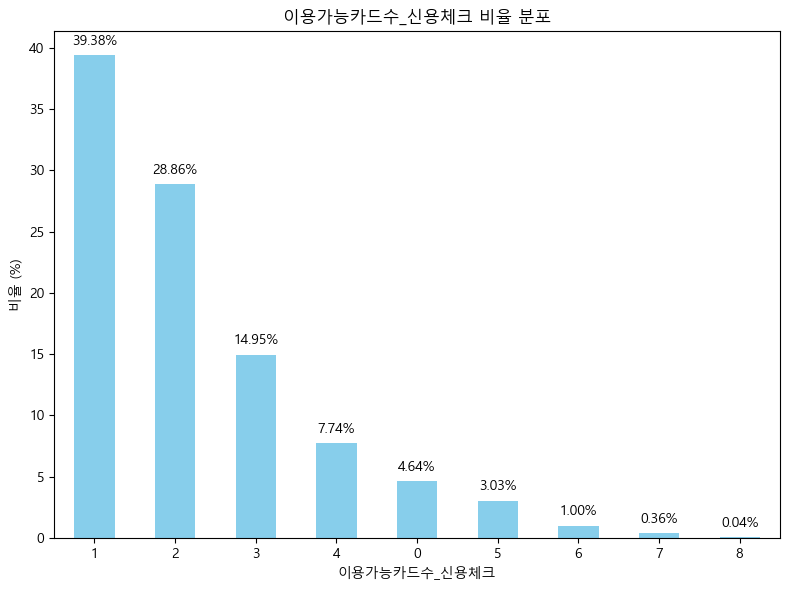

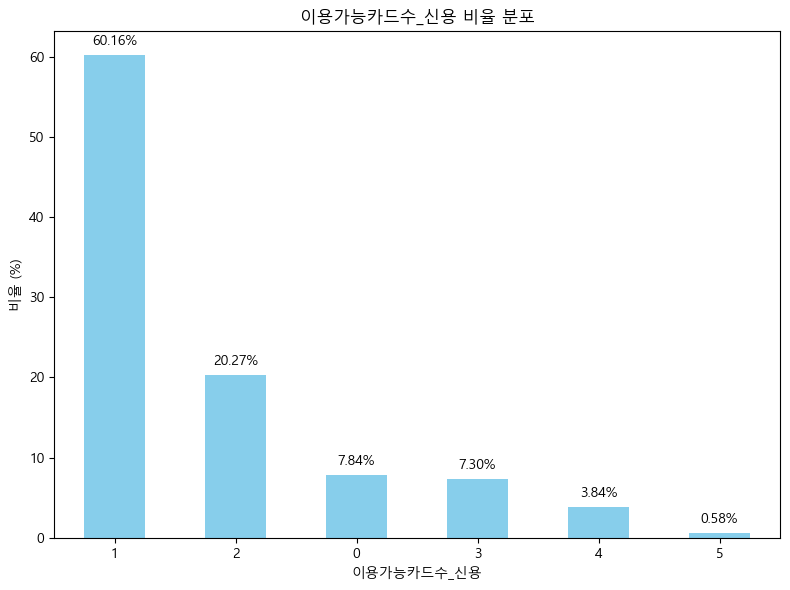

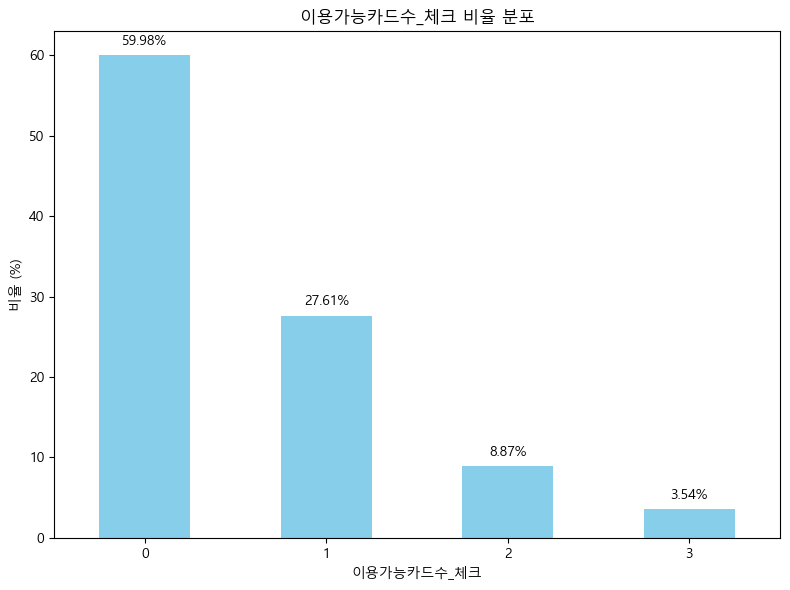

In [22]:
for column in select_columns:
    # 데이터 분포 계산
    value_counts = df[column].value_counts()

    total = len(df[column])
    percentages = value_counts / total * 100

    plt.figure(figsize=(8, 6))
    ax = percentages.plot(kind='bar', color='skyblue')
    plt.title(f'{column} 비율 분포')
    plt.xlabel(column)
    plt.ylabel('비율 (%)')
    plt.xticks(rotation=0)

    # 막대 위에 값 표시
    for i, p in enumerate(ax.patches):
        ax.annotate(f'{percentages.iloc[i]:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()
    plt.show()
    plt.close() 

---

#### 실제 카드 이용 관련:

이용카드수_신용체크

이용카드수_신용

이용카드수_체크

이용금액_R3M_신용체크

이용금액_R3M_신용

이용금액_R3M_체크


In [40]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

df = pd.read_csv('병합된 데이터\\1_회원정보_merged.csv')

select_columns = [
    '이용카드수_신용체크',
    '이용카드수_신용',
    '이용카드수_체크'
]

In [41]:
for column in select_columns:
    print(f"컬럼: {column}")
    print(df[column].value_counts())
    print()

컬럼: 이용카드수_신용체크
이용카드수_신용체크
1    1125925
2     536157
0     433328
3     222779
4      72103
5       9454
6        254
Name: count, dtype: int64

컬럼: 이용카드수_신용
이용카드수_신용
1    1250336
0     492003
2     456168
3     149119
4      52325
5         49
Name: count, dtype: int64

컬럼: 이용카드수_체크
이용카드수_체크
0    2022815
1     370162
2       7023
Name: count, dtype: int64



이상치 확인

In [6]:
def find_outliers_IQR(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

for col in ['소지카드수_유효_신용', '유효카드수_신용체크', '유효카드수_신용']:
    outliers = find_outliers_IQR(df[col])
    print(f"{col}의 이상치:\n", outliers)


소지카드수_유효_신용의 이상치:
 3          2
7          2
8          3
12         2
13         2
          ..
2399975    3
2399977    3
2399979    2
2399980    3
2399993    3
Name: 소지카드수_유효_신용, Length: 554051, dtype: int64
유효카드수_신용체크의 이상치:
 8          7
39         7
103        7
218        7
265        7
          ..
2398946    7
2399048    7
2399536    7
2399792    7
2399900    7
Name: 유효카드수_신용체크, Length: 10451, dtype: int64
유효카드수_신용의 이상치:
 8          4
25         4
37         4
39         4
49         4
          ..
2399958    4
2399967    4
2399975    4
2399980    4
2399993    4
Name: 유효카드수_신용, Length: 114937, dtype: int64


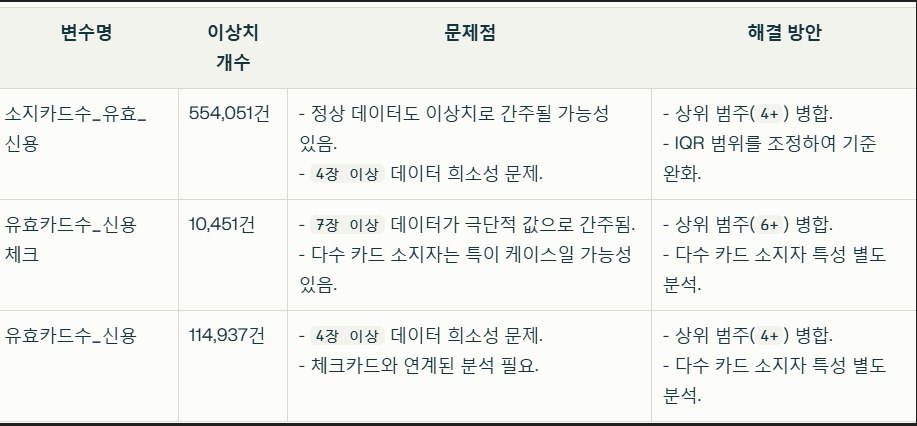

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import zscore  # zscore 함수 임포트 추가
import matplotlib.pyplot as plt


# 1. IQR 기준 재조정
def find_outliers_IQR(column):
    column = pd.to_numeric(column, errors='coerce')
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)  # 원래 IQR 기준으로 복구
    upper_bound = Q3 + (1.5 * IQR)
    return column[(column < lower_bound) | (column > upper_bound)]

# 2. Z-점수 활용
def find_outliers_zscore(column):
    column = pd.to_numeric(column, errors='coerce')
    z_scores = zscore(column.dropna())
    outliers = column.iloc[np.where(abs(z_scores) > 3)[0]]  # 인덱스 보존
    return outliers

# 3. 이상치 탐지 실행 (IQR)
print("=== IQR 기준 이상치 ===")
for col in select_columns:
    outliers = find_outliers_IQR(df[col])
    print(f"{col}의 IQR 기준 이상치:\n", outliers)

# 4. 이상치 탐지 실행 (Z-점수)
print("\n=== Z-점수 기준 이상치 ===")
for col in select_columns:
    outliers = find_outliers_zscore(df[col])
    print(f"{col}의 Z-점수 기준 이상치:\n", outliers)


=== IQR 기준 이상치 ===
회원여부_이용가능의 IQR 기준 이상치:
 15         0
30         0
68         0
88         0
107        0
          ..
2399935    0
2399943    0
2399956    0
2399990    0
2399992    0
Name: 회원여부_이용가능, Length: 113820, dtype: int64
회원여부_이용가능_CA의 IQR 기준 이상치:
 9          0
15         0
17         0
30         0
61         0
          ..
2399969    0
2399981    0
2399984    0
2399990    0
2399992    0
Name: 회원여부_이용가능_CA, Length: 287757, dtype: int64
회원여부_이용가능_카드론의 IQR 기준 이상치:
 Series([], Name: 회원여부_이용가능_카드론, dtype: int64)
회원여부_연체의 IQR 기준 이상치:
 10         1
16         1
155        1
172        1
188        1
          ..
2399672    1
2399686    1
2399833    1
2399875    1
2399985    1
Name: 회원여부_연체, Length: 40992, dtype: int64
이용거절여부_카드론의 IQR 기준 이상치:
 5          1
6          1
9          1
14         1
16         1
          ..
2399984    1
2399988    1
2399990    1
2399994    1
2399999    1
Name: 이용거절여부_카드론, Length: 474230, dtype: int64

=== Z-점수 기준 이상치 ===
회원여부_이용가능의 Z-점수 기준 이상치:
 15    

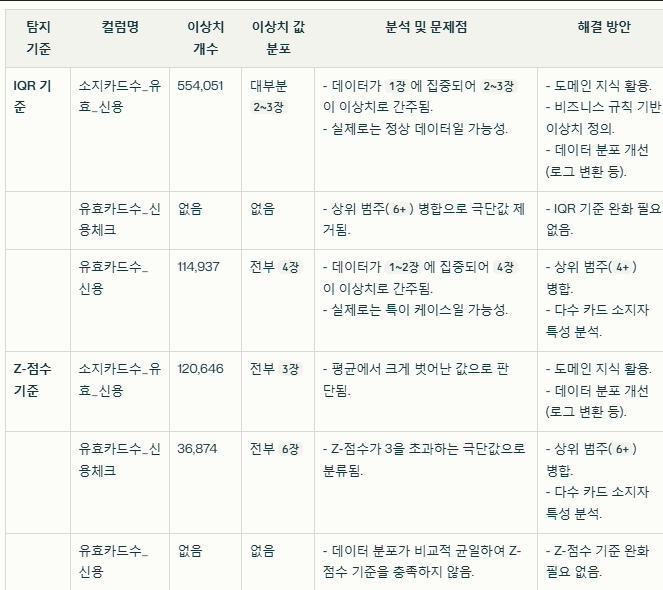

#### **1. IQR 사용 이유 및 결과**

- **사용 이유**:
    - 비정규 분포 데이터에 적합하며, 중앙값(Q2)과 사분위수(Q1, Q3)를 기반으로 이상치를 탐지.
- **결과**:
    - `소지카드수_유효_신용`: `2~3장`이 이상치로 탐지됨 → 데이터가 `1장`에 집중된 편향성 때문.
    - `유효카드수_신용`: `4장`이 이상치로 탐지됨 → 상위 범주 희소성 때문.
    - `유효카드수_신용체크`: 이상치 없음 → 상위 범주 병합으로 극단값 제거.


#### **2. Z-스코어 사용 이유 및 결과**

- **사용 이유**:
    - 평균과 표준편차를 기반으로 극단값(±3 표준편차 초과)을 탐지.
- **결과**:
    - `소지카드수_유효_신용`: `3장`이 이상치로 탐지됨 → 평균(`1.2장`)에서 멀리 떨어진 값으로 판단.
    - `유효카드수_신용체크`: `6장`이 이상치로 탐지됨 → 평균(`2.1장`)에서 벗어난 극단값으로 분류.
    - `유효카드수_신용`: 이상치 없음 → 데이터 분포가 균일하여 극단값 없음.

#### **3. 결론**

| **기준** | **IQR** | **Z-스코어** |
| :-- | :-- | :-- |
| **적합한 데이터** | 비정규 분포, 편향된 데이터 | 정규 분포, 극단값 탐지 |
| **결과 차이 원인** | 편향된 분포에서 상대적 드문 값이 이상치로 탐지 | 평균 중심으로 극단값만 탐지 |


#### **4. 권장 전략**

- 도메인 지식 활용: "3장 이상 소지는 VIP 고객" 등 비즈니스 규칙 추가.
- 데이터 변환: 로그 변환 등으로 데이터 분포 개선.
- 시각화 검토: 박스플롯, 히스토그램으로 이상치 여부 직접 확인.



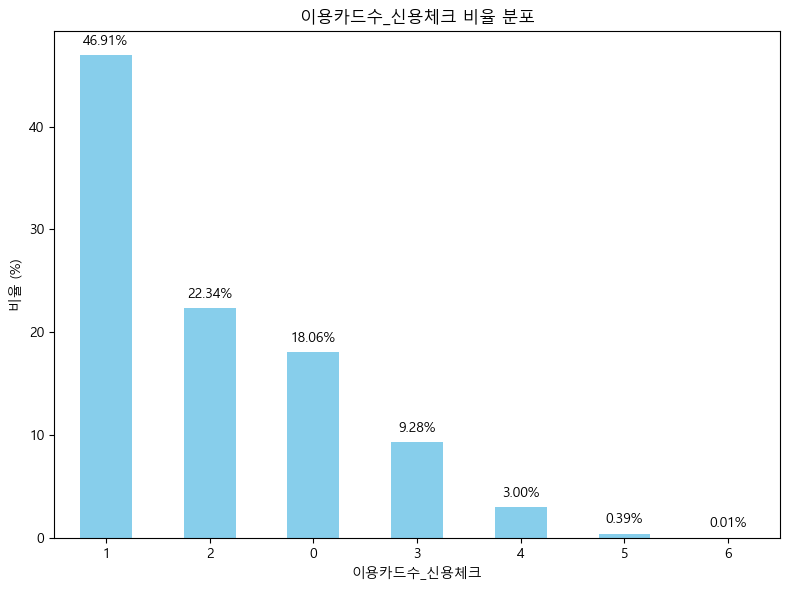

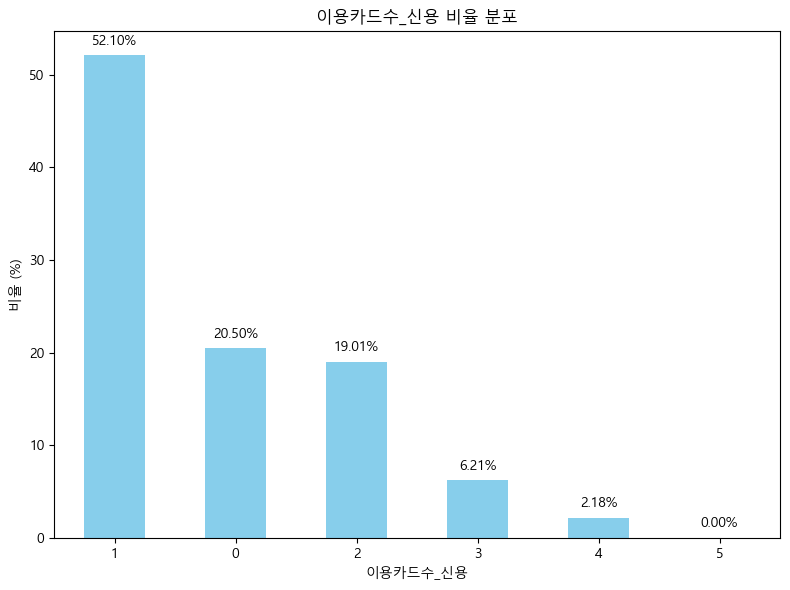

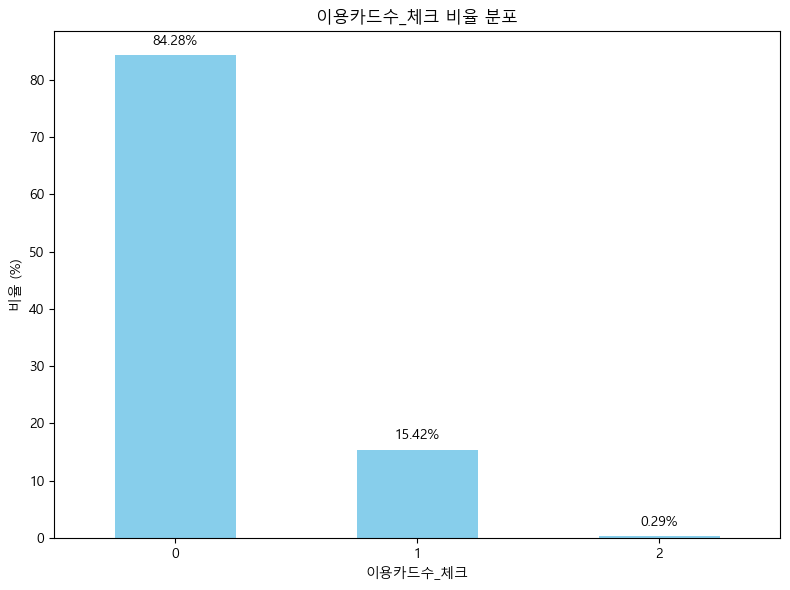

In [34]:
for column in select_columns:
    # 데이터 분포 계산
    value_counts = df[column].value_counts()

    total = len(df[column])
    percentages = value_counts / total * 100

    plt.figure(figsize=(8, 6))
    ax = percentages.plot(kind='bar', color='skyblue')
    plt.title(f'{column} 비율 분포')
    plt.xlabel(column)
    plt.ylabel('비율 (%)')
    plt.xticks(rotation=0)

    # 막대 위에 값 표시
    for i, p in enumerate(ax.patches):
        ax.annotate(f'{percentages.iloc[i]:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()
    plt.show()
    plt.close() 

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

df = pd.read_csv('병합된 데이터\\1_회원정보_merged.csv')

select_columns = [
    '이용카드수_신용체크',
    '이용카드수_신용',
    '이용카드수_체크',
    '이용금액_R3M_신용체크',
    '이용금액_R3M_신용',
    '이용금액_R3M_체크'
]

In [47]:
print(df['이용금액_R3M_신용'].head())  

0      196
1    13475
2    23988
3     3904
4        0
Name: 이용금액_R3M_신용, dtype: int64


'이용카드수_신용체크', '이용카드수_신용', '이용카드수_체크' 이상치 확인

In [8]:
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

for col in ['이용카드수_신용체크', '이용카드수_신용', '이용카드수_체크']:
    outliers = detect_outliers_iqr(df[col])
    print(f"{col} 이상치 개수: {len(outliers)}")


이용카드수_신용체크 이상치 개수: 81811
이용카드수_신용 이상치 개수: 52374
이용카드수_체크 이상치 개수: 377185


In [9]:
from scipy.stats import zscore

# 로그 변환 (음수 방지를 위해 1 추가)
df['로그_이용금액_R3M_신용체크'] = np.log1p(df['이용금액_R3M_신용체크'])

# Z-스코어 계산
z_scores = zscore(df['로그_이용금액_R3M_신용체크'])
outliers_z = df[abs(z_scores) > 3]

# IQR 계산
Q1 = df['이용금액_R3M_신용체크'].quantile(0.25)
Q3 = df['이용금액_R3M_신용체크'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df['이용금액_R3M_신용체크'] < Q1 - 1.5*IQR) | (df['이용금액_R3M_신용체크'] > Q3 + 1.5*IQR)]

print(f"Z-스코어 기준 이상치 개수: {len(outliers_z)}")
print(f"IQR 기준 이상치 개수: {len(outliers_iqr)}")


c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Z-스코어 기준 이상치 개수: 0
IQR 기준 이상치 개수: 198227


- **이용카드수 (이산형 변수)**:
    - `이용카드수_체크`에서 **377,185건**의 이상치가 탐지됨 (IQR 기준).
    - 카드 수 분포가 극단적으로 편향되어 있어, 작은 값 변화가 많은 이상치를 발생시킨 것으로 보입니다.
- **이용금액 (연속형 변수)**:
    - `Z-스코어`는 0건, `IQR`은 **198,227건**의 이상치 탐지.
    - **원인**: 금액 데이터가 심하게 오른쪽으로 치우친 분포를 보이기 때문입니다.
    - **해석**: Z-스코어는 정규 분포를 가정하므로 비정규 데이터에선 효과적이지 않을 수 있습니다.

---

#### **2. 원인 분석**

| **컬럼** | **이상치 원인** |
| :-- | :-- |
| 이용카드수_체크 | - 대부분의 고객이 체크카드를 적게 사용 (`0~1장`) → `2장 이상`이 드물어 IQR 기준으로 이상치 탐지. |
| 이용금액_R3M_신용체크 | - 소수 고객의 고액 이용금액으로 인해 데이터 분포가 오른쪽으로 치우침 → Z-스코어는 평균에 민감하므로 탐지 실패. |

---

#### **3. 해결 방안**

##### **(1) 이산형 데이터 (`이용카드수`)**

- **비즈니스 규칙 재정의**:
    - "체크카드 2장 이상 이용"을 비정상이 아닌 **활성 고객**으로 분류할 수 있습니다.


##### **(2) 연속형 데이터 (`이용금액`)**

- **로그 변환 적용**:
    - 데이터 분포를 정규 분포에 가깝게 변환한 후 Z-스코어를 적용합니다.

- **도메인 기반 임계값 설정**:
    - 금융 데이터의 경우, **상위 1%** 값을 이상치로 정의할 수 있습니다.

### **최종 권장 사항**

1. **이상치 제거보다 분석을 우선시**:
    - 고액 이용자나 다수 카드 사용자는 중요한 고객 세그먼트일 수 있습니다.
2. **데이터 분포 개선**:
    - 연속형 변수는 로그/박스-콕스 변환, 이산형 변수는 범주 병합을 적용합니다.
3. **비즈니스 룰과 통계적 방법 결합**:
    - "이용금액 상위 1%는 VIP로 분류"와 같은 규칙을 추가합니다.

In [15]:
# 상위 25%와 하위 25% 기준으로 고액/저액 사용자 구분
for col in ['이용금액_R3M_신용체크', '이용금액_R3M_신용', '이용금액_R3M_체크']:
    # 상위 25% (Q3)와 하위 25% (Q1) 계산
    Q1 = df[col].quantile(0.25)  # 하위 25%
    Q3 = df[col].quantile(0.75)  # 상위 25%

    # 고액/저액 사용자 구분
    df[f'{col}_사용자구분'] = df[col].apply(lambda x: '고액' if x > Q3 else ('저액' if x < Q1 else '중간'))

print(df[['이용금액_R3M_신용체크', '이용금액_R3M_신용체크_사용자구분']].head())

   이용금액_R3M_신용체크 이용금액_R3M_신용체크_사용자구분
0            196                  저액
1          13475                  중간
2          23988                  고액
3           3904                  중간
4           1190                  중간


In [13]:
for col in ['이용금액_R3M_신용체크', '이용금액_R3M_신용', '이용금액_R3M_체크']:
    # 상위 10%와 하위 10% 기준 계산
    upper_threshold = df[col].quantile(0.90)  # 상위 10%
    lower_threshold = df[col].quantile(0.10)  # 하위 10%

    df[f'{col}_사용자구분'] = df[col].apply(lambda x: '고액' if x > upper_threshold else ('저액' if x < lower_threshold else '중간'))

print(df[['이용금액_R3M_신용', '이용금액_R3M_신용_사용자구분']].head())


   이용금액_R3M_신용 이용금액_R3M_신용_사용자구분
0          196                중간
1        13475                중간
2        23988                중간
3         3904                중간
4            0                중간


In [14]:
for col in ['이용금액_R3M_신용체크', '이용금액_R3M_신용', '이용금액_R3M_체크']:
    mean_value = df[col].mean()  # 평균 계산

    df[f'{col}_사용자구분'] = df[col].apply(lambda x: '고액' if x > mean_value else '저액')

print(df[['이용금액_R3M_체크', '이용금액_R3M_체크_사용자구분']].head())


   이용금액_R3M_체크 이용금액_R3M_체크_사용자구분
0            0                저액
1            0                저액
2            0                저액
3            0                저액
4         1190                저액


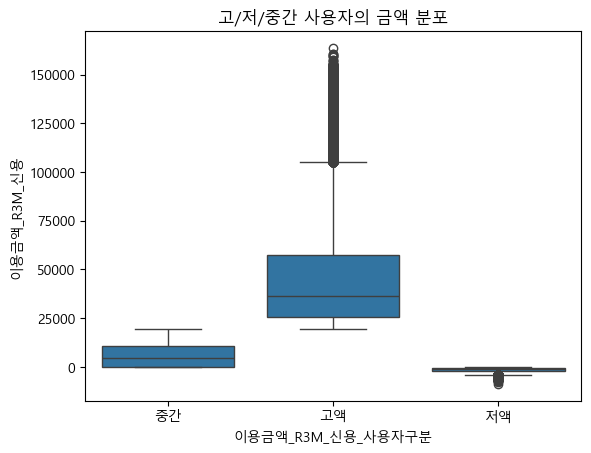

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 고/저/중간 사용자의 금액 분포 시각화
sns.boxplot(x='이용금액_R3M_신용_사용자구분', y='이용금액_R3M_신용', data=df)
plt.title("고/저/중간 사용자의 금액 분포")
plt.show()

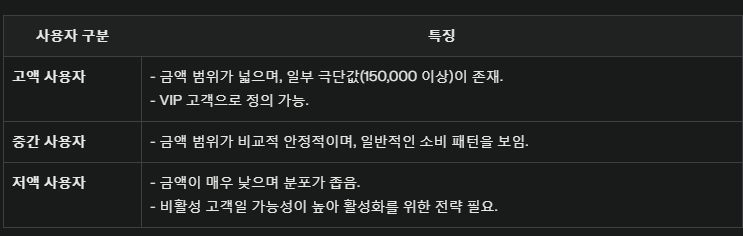

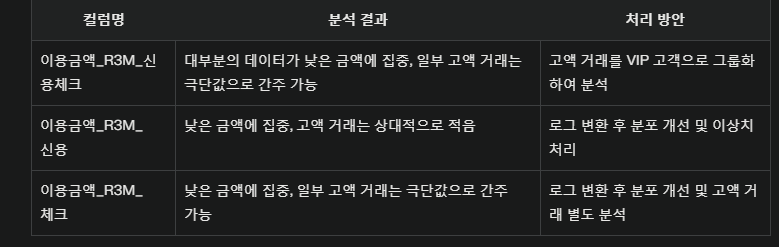

### 이용 금액 음수값 비율 확인

In [29]:
# 음수 값 필터링
negative_values = df['이용금액_R3M_신용체크'][df['이용금액_R3M_신용체크'] < 0]

# 분포 계산
negative_count = negative_values.count()
total_count = df['이용금액_R3M_신용체크'].count()
negative_percentage = (negative_count / total_count) * 100

print(f"음수 값의 개수: {negative_count}")
print(f"전체 데이터의 개수: {total_count}")
print(f"음수 값의 비율: {negative_percentage:.2f}%")


음수 값의 개수: 130052
전체 데이터의 개수: 2400000
음수 값의 비율: 5.42%


In [ ]:
# 음수 값 필터링
negative_values = df['이용금액_R3M_신용'][df['이용금액_R3M_신용'] < 0]

# 분포 계산
negative_count = negative_values.count()
total_count = df['이용금액_R3M_신용'].count()
negative_percentage = (negative_count / total_count) * 100

print(f"음수 값의 개수: {negative_count}")
print(f"전체 데이터의 개수: {total_count}")
print(f"음수 값의 비율: {negative_percentage:.2f}%")


음수 값의 개수: 151964
전체 데이터의 개수: 2400000
음수 값의 비율: 6.33%


In [30]:
# 음수 값 필터링
negative_values = df['이용금액_R3M_체크'][df['이용금액_R3M_체크'] < 0]

# 분포 계산
negative_count = negative_values.count()
total_count = df['이용금액_R3M_체크'].count()
negative_percentage = (negative_count / total_count) * 100

print(f"음수 값의 개수: {negative_count}")
print(f"전체 데이터의 개수: {total_count}")
print(f"음수 값의 비율: {negative_percentage:.2f}%")


음수 값의 개수: 0
전체 데이터의 개수: 2400000
음수 값의 비율: 0.00%


이용금액_R3M_신용체크: 음수 값의 개수는 130,052개로, 전체 데이터의 5.42%를 차지합니다.

이용금액_R3M_신용: 음수 값의 개수는 151,964개로, 전체 데이터의 6.33%를 차지합니다.

이용금액_R3M_체크: 음수 값이 전혀 없습니다.

---

신용체크 카드: 약 5.42%의 데이터가 음수 값을 가지고 있습니다. 이는 신용체크 카드를 사용하여 돈을 빌린 경우일 수 있습니다.

신용 카드: 약 6.33%의 데이터가 음수 값을 가지고 있습니다. 이는 신용 카드를 사용하여 돈을 빌린 경우일 수 있습니다.

체크 카드: 음수 값이 전혀 없다는 것은 체크 카드를 사용하여 돈을 빌리는 경우가 없다는 것을 의미합니다. 체크 카드는 일반적으로 계좌에 있는 금액만큼만 사용할 수 있기 때문에 음수 값이 나올 수 없습니다.

주요 카드 이용 패턴:

_1순위카드이용금액

_1순위카드이용건수

_1순위신용체크구분


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

df = pd.read_csv('병합된 데이터\\1_회원정보_merged.csv')

select_columns = [
    '_1순위카드이용금액',
    '_1순위카드이용건수',
    '_1순위신용체크구분'
]

In [37]:
for column in select_columns:
    print(f"컬럼: {column}")
    print(df[column].value_counts())
    print()

컬럼: _1순위카드이용금액
_1순위카드이용금액
0        491101
1399        144
386         143
796         143
1133        142
          ...  
84157         1
89745         1
64520         1
71711         1
56510         1
Name: count, Length: 81963, dtype: int64

컬럼: _1순위카드이용건수
_1순위카드이용건수
-2      421728
-1       66230
 0       65256
 1       62980
 2       59690
         ...  
 220        27
 221        16
 222        11
 223         3
 224         2
Name: count, Length: 227, dtype: int64

컬럼: _1순위신용체크구분
_1순위신용체크구분
신용    2295461
체크      76589
Name: count, dtype: int64



-1: 데이터 누락.

-2: 카드 이용 내역 없음 또는 미확인 상태.

In [10]:
# 음수 값 필터링
negative_values = df['_1순위카드이용건수'][df['_1순위카드이용건수'] < 0]

# 분포 계산
negative_count = negative_values.count()
total_count = df['_1순위카드이용건수'].count()
negative_percentage = (negative_count / total_count) * 100

print(f"음수 값의 개수: {negative_count}")
print(f"전체 데이터의 개수: {total_count}")
print(f"음수 값의 비율: {negative_percentage:.2f}%")

음수 값의 개수: 487958
전체 데이터의 개수: 2400000
음수 값의 비율: 20.33%


In [11]:
# 음수 값 필터링
negative_values = df['_2순위카드이용건수'][df['_2순위카드이용건수'] < 0]

# 분포 계산
negative_count = negative_values.count()
total_count = df['_2순위카드이용건수'].count()
negative_percentage = (negative_count / total_count) * 100

print(f"음수 값의 개수: {negative_count}")
print(f"전체 데이터의 개수: {total_count}")
print(f"음수 값의 비율: {negative_percentage:.2f}%")

음수 값의 개수: 6180
전체 데이터의 개수: 2400000
음수 값의 비율: 0.26%


In [ ]:
for column in select_columns:
    # 데이터 분포 계산
    value_counts = df[column].value_counts()

    total = len(df[column])
    percentages = value_counts / total * 100

    plt.figure(figsize=(8, 6))
    ax = percentages.plot(kind='bar', color='skyblue')
    plt.title(f'{column} 비율 분포')
    plt.xlabel(column)
    plt.ylabel('비율 (%)')
    plt.xticks(rotation=0)

    # 막대 위에 값 표시
    for i, p in enumerate(ax.patches):
        ax.annotate(f'{percentages.iloc[i]:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()
    plt.show()
    plt.close() 

#### 회원 이력 관련:

입회경과개월수_신용

탈회횟수_누적

최종탈회후경과월

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

df = pd.read_csv('병합된 데이터\\1_회원정보_merged.csv')

select_columns = [
    '입회경과개월수_신용',
    '탈회횟수_누적',
    '최종탈회후경과월'
]

In [54]:
for column in select_columns:
    print(f"컬럼: {column}")
    print(df[column].value_counts())
    print()

컬럼: 입회경과개월수_신용
입회경과개월수_신용
6      119886
5       64069
4       59968
3       55969
2       52023
        ...  
334         1
329         1
335         1
330         1
336         1
Name: count, Length: 335, dtype: int64

컬럼: 탈회횟수_누적
탈회횟수_누적
0    1403785
1     759487
2     236728
Name: count, dtype: int64

컬럼: 최종탈회후경과월
최종탈회후경과월
0      1411713
47       76113
46       75812
48       73304
45       64384
        ...   
117          2
15           1
89           1
39           1
53           1
Name: count, Length: 71, dtype: int64



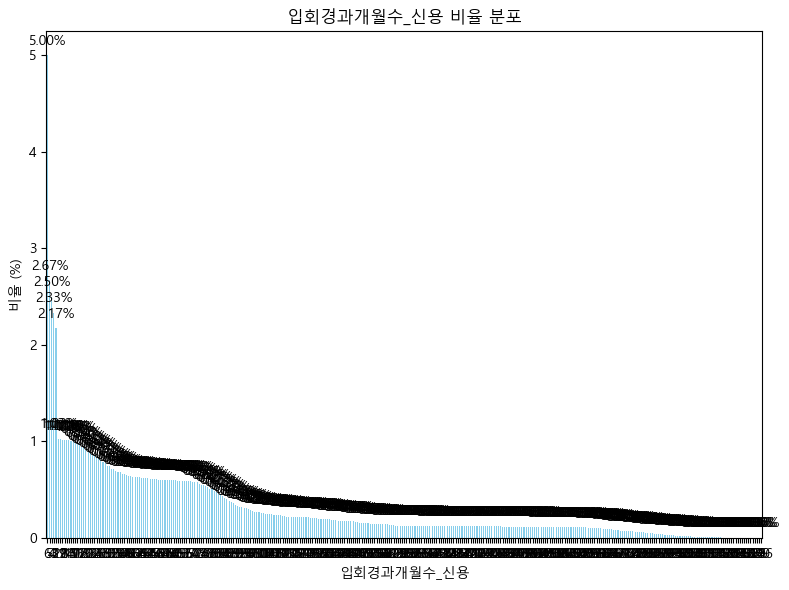

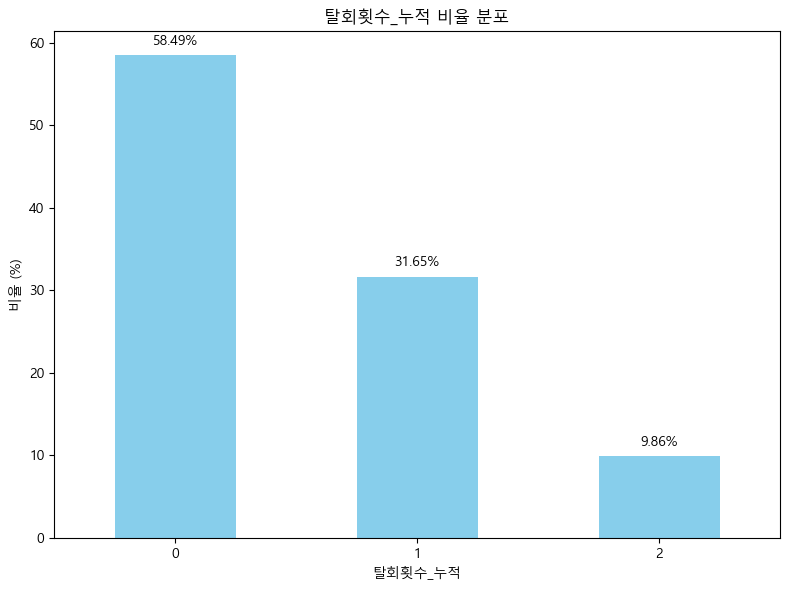

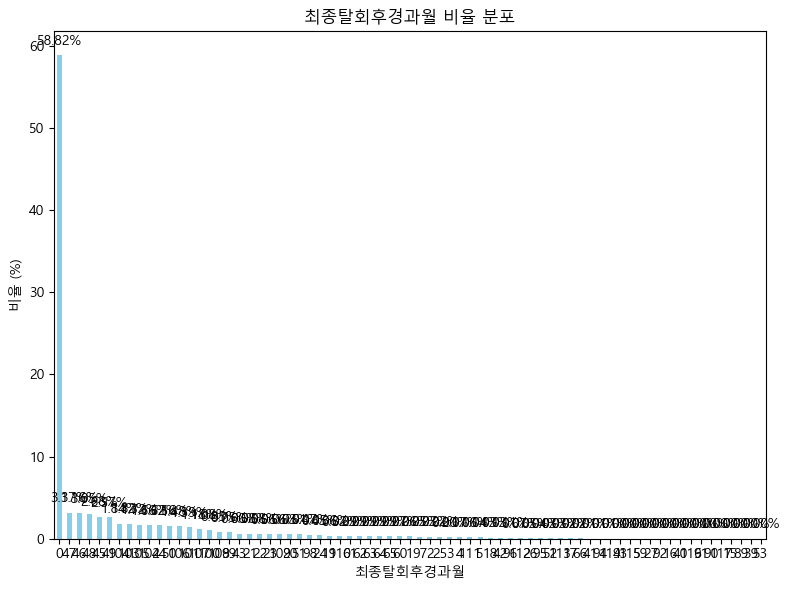

In [55]:
for column in select_columns:
    # 데이터 분포 계산
    value_counts = df[column].value_counts()

    total = len(df[column])
    percentages = value_counts / total * 100

    plt.figure(figsize=(8, 6))
    ax = percentages.plot(kind='bar', color='skyblue')
    plt.title(f'{column} 비율 분포')
    plt.xlabel(column)
    plt.ylabel('비율 (%)')
    plt.xticks(rotation=0)

    # 막대 위에 값 표시
    for i, p in enumerate(ax.patches):
        ax.annotate(f'{percentages.iloc[i]:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()
    plt.show()
    plt.close() 